In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as spline

%matplotlib inline

In [8]:
def get_t(t,p0,p1,alpha = .5):
    a = (p0-p1)**2
    b = a.sum()**(alpha*.5)
#     a = np.linalg.norm(p1-p0,ord=2)
    return b+t

def catmulrom(t):
    if t>=tvec[1] and t<tvec[2]:
        ind=0
    elif t>=tvec[2] and t<tvec[3]:
        ind=1
    elif t>= tvec[3] and t<tvec[4]:
        ind=2
    elif t>=tvec[4] and t<tvec[5]:
        ind = 3
    elif t>=tvec[5] and t<tvec[6]:
        ind=4
    else:
        t = tvec[2]
        ind = 1
#     print(ind)
    p0 = control_points[ind,:]
    p1 = control_points[ind+1,:]
    p2 = control_points[ind +2,:]
    p3 = control_points[ind+3,:]
       
    t0, t1, t2, t3 = tvec[ind], tvec[ind+1], tvec[ind+2], tvec[ind+3]
    
    a1 = (t1 - t) / (t1 - t0) * p0 + (t - t0) / (t1 - t0) * p1
    a2 = (t2 - t) / (t2 - t1) * p1 + (t - t1) / (t2 - t1) * p2
    a3 = (t3 - t) / (t3 - t2) * p2 + (t - t2) / (t3 - t2) * p3
    
    b1 = (t2 - t) / (t2 - t0) * a1 + (t - t0) / (t2 - t0) * a2
    b2 = (t3 - t) / (t3 - t1) * a2 + (t - t1) / (t3 - t1) * a3;
    
    c = (t2 - t) / (t2 - t1) * b1 + (t - t1) / (t2 - t1) * b2;
    return c
        



# list of control points for catmull rom spline
control_points = np.array([[0., .5, -70],
                          [0, .5, -25.],
                          [0, .5, -5],
                          [0, .5, 0],
                          [0, .5, 110],
                          [24.14, .5, 174.14],
                          [110.6, .5, 259.6],
                          [194.14, .5, 344.14]])

tvec = np.zeros([8,])
for ind in range(1,8):
    tvec[ind] = get_t(tvec[ind-1], control_points[ind-1], control_points[ind])
       


t2dist = (tvec[6] - tvec[3]) / 300.
t = tvec[1]
t_old = tvec[1]

In [21]:
print(tvec)
trajectory = []

t = np.linspace(6.71,43.2,num=100)
trajectory = np.array([catmulrom(_t) for _t in t])
target = catmulrom(15)

            

[ 0.          6.70820393 11.18033989 13.41640786 23.90449635 32.18292146
 43.2087028  54.11065727]


In [22]:
print(target)
print(trajectory.shape)

[-0.33083057  0.5         9.15553741]
(100, 3)


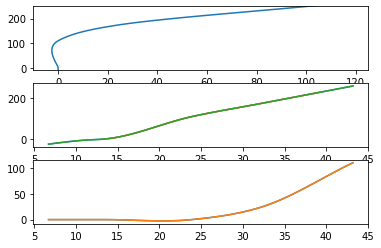

In [36]:
fig,ax = plt.subplots(3,1)
ax[0].plot(trajectory[:,0],trajectory[:,2])
ax[0].set_xlim([-10,125])
ax[0].set_ylim([-10,250])

ax[1].plot(t,trajectory[:,2])
ax[2].plot(t,trajectory[:,0])


z2t_spl = spline(trajectory[:,2],t)

t2x_spl = spline(t,trajectory[:,0])
t2z_spl = spline(t,trajectory[:,2])

ax[1].plot(z2t_spl(np.linspace(0,230)),np.linspace(0,230))
ax[1].plot(t,t2z_spl(t))


ax[2].plot(t,t2x_spl(t))

In [28]:
25*(2**.5)

35.35533905932738

In [47]:
rzone_left = {'xcenter': -31.6, 'zcenter': 181.6, 'scale': 25}
rzone_left['zfront'] = rzone_left['zcenter'] - rzone_left['zcenter']/rzone_left['scale']/2
rzone_left['zback'] = rzone_left['zfront']+25/2**.5
rzone_left.update({'tfront':z2t_spl(rzone_left['zfront']),'tback':z2t_spl(rzone_left['zback'])})
rzone_left['t_antic'] = rzone_left['tfront']-5
rzone_left['z_antic'] = t2z_spl(rzone_left['t_antic'])
print(rzone_left)


rzone_right = {'xcenter': 88.2, 'zcenter': 238.2, 'scale': 25}
rzone_right['zfront'] = rzone_right['zcenter'] - rzone_right['zcenter']/rzone_right['scale']/2
rzone_right['zback'] = rzone_right['zfront']+25/2**.5
rzone_right.update({'tfront':z2t_spl(rzone_right['zfront']),'tback':z2t_spl(rzone_right['zback'])})
rzone_right['t_antic'] = rzone_right['tfront']-5
print(rzone_right)



#     else:
#         rzone_left = {'xcenter': -88.7, 'zcenter': 238.7, 'scale': 25}
#         rzone_right = {'xcenter': 31.6, 'zcenter': 181.6, 'scale': 25}
    

{'xcenter': -31.6, 'zcenter': 181.6, 'scale': 25, 'zfront': 177.968, 'zback': 195.64566952966368, 'tfront': array(32.67690446), 'tback': array(34.95799061), 't_antic': 27.67690445738824, 'z_antic': array(140.57648984)}
{'xcenter': 88.2, 'zcenter': 238.2, 'scale': 25, 'zfront': 233.43599999999998, 'zback': 251.11366952966367, 'tfront': array(39.83365219), 'tback': array(42.11405525), 't_antic': 34.83365218636522}


In [39]:
import numpy as np
a = np.array([1,2,3])
print(a**2)

[1 4 9]
